In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import datasets, linear_model, metrics

# REGRESSION
## MODELLING

In [2]:
df_New = pd.read_excel('Dataset_up.xlsx')
df_New

,Unnamed: 0,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day_Number,Day
0,0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,6,Sabtu
1,1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,3,Rabu
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,4,Kamis
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,4,Kamis
4,4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,0,Minggu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6018,6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,4,Kamis
6019,6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,3,Rabu
6020,6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,0,Minggu
6021,6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,4,Kamis


- Store: nomor toko 
- Date: tanggal penjualan
- Weekly_Sales: penjualan mingguan toko
- Holiday_Flag: banyaknya hari libur pada minggu tersebut
- Temperature: suhu pada minggu penjualan
- Fuel_Price: biaya bahan bakar di daerah tersebut
- CPI: (Consumer Price Index) indeks harga konsumen yang berlaku
- Unemployment: tingkat pengangguran yang berlaku
- Month: bulan penjualan (dalam numerik) pada tahun tersebut
- Year: tahun penjualan
- Day_Number: implementasi dalam angka dari kolom `Day` 
- Day: hari penjualan

In [3]:
df_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6023 entries, 0 to 6022
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    6023 non-null   int64         
 1   Store         6023 non-null   int64         
 2   Date          6023 non-null   datetime64[ns]
 3   Weekly_Sales  6023 non-null   float64       
 4   Holiday_Flag  6023 non-null   int64         
 5   Temperature   6023 non-null   float64       
 6   Fuel_Price    6023 non-null   float64       
 7   CPI           6023 non-null   float64       
 8   Unemployment  6023 non-null   float64       
 9   Month         6023 non-null   int64         
 10  Year          6023 non-null   int64         
 11  Day_Number    6023 non-null   int64         
 12  Day           6023 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 611.8+ KB


In [4]:
#Removal column 
df_New.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
#Removal column
df_New.drop('Day', axis=1, inplace=True)

In [6]:
#Removal column
df_New.drop('Date', axis=1, inplace=True)

In [7]:
df_New

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day_Number
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,0
...,...,...,...,...,...,...,...,...,...,...
6018,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,4
6019,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,3
6020,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,0
6021,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,4


## A. Additional Data Preparation before Modelling

In [8]:
#Defining feature matrix(X) and response vector(y)
X = df_New.drop(['Weekly_Sales'],axis=1)
y = df_New['Weekly_Sales']

In [9]:
#Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## B. Linear Regression

In [10]:
 # create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [-14558.5782521   22142.03182344   -934.54879951  75465.76136958
  -2010.95593294 -11010.27992529   5247.60393929 -38068.13223257
  -7080.05404089]
Intercept:  78160058.73866212


Variance score: 0.15122125623618643


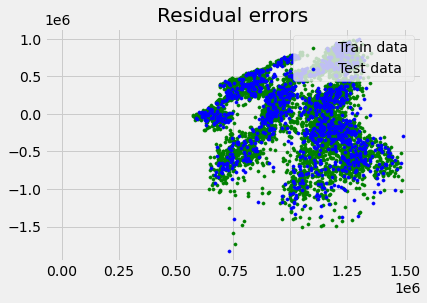

In [11]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

### B1. Evaluation

In [12]:
y_pred = reg.predict(X_test)

In [13]:
# MAE
from sklearn.metrics import mean_absolute_error
mae_lreg = mean_absolute_error(y_test, y_pred)
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 430365.87206897634


In [14]:
# MSE
from sklearn.metrics import mean_squared_error
mse_lreg = mean_squared_error(y_test, y_pred)
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 268123763332.19513


In [15]:
# RMSE
from sklearn.metrics import mean_squared_error
rmse_lreg = mean_squared_error(y_test, y_pred)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

RMSE: 517806.6852911375


## C. Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [-14558.74436673  22039.49168476   -934.01264466  75177.24222357
  -2011.70091708 -11001.05443238   5252.94934988 -37917.89460655
  -7073.71326285]
Intercept:  77858881.60234262


### C1. Evaluation

In [17]:
y_pred = model.predict(X_test)

In [18]:
# MAE
from sklearn.metrics import mean_absolute_error
mae_ridge = mean_absolute_error(y_test, y_pred)
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 430364.895750012


In [19]:
# MSE
from sklearn.metrics import mean_squared_error
mse_ridge = mean_squared_error(y_test, y_pred)
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 268123443576.494


In [20]:
# RMSE
from sklearn.metrics import mean_squared_error
mse_ridge = mean_squared_error(y_test, y_pred)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

RMSE: 517806.3765313189


## D. Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

regressor_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

### D1. Evaluation

In [22]:
y_pred = regressor_rf.predict(X_test)

In [23]:
# MAE
from sklearn.metrics import mean_absolute_error
mae_rf = mean_absolute_error(y_test, y_pred)
print('MAE:', mean_absolute_error(y_test, y_pred))

# MSE
from sklearn.metrics import mean_squared_error
mse_rf = mean_absolute_error(y_test, y_pred)
print('MSE:', mean_squared_error(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
rmse_rf = mean_absolute_error(y_test, y_pred)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MAE: 223185.77432712252
MSE: 100089287268.63945
RMSE: 316368.91008542455


### D2. Random Forest Tuning

In [24]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [25]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [26]:
from sklearn.model_selection import GridSearchCV


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [27]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(X_train, y_train)

print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}  



In [28]:
#using the best parameter setup
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 4, max_features = 'auto', max_depth= 50, bootstrap=True) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=10)

In [29]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_prob": randmf.predict( 
( X_test ) ) } ) 
y_pred_rf1

,actual,predicted_prob
1992,551799.63,6.855000e+05
1128,883569.38,9.150904e+05
1244,574955.95,5.929841e+05
1745,1953539.85,1.974173e+06
4073,1430348.10,1.410520e+06
...,...,...
5930,644285.33,7.282883e+05
5800,280357.30,2.917514e+05
3754,483011.69,5.926461e+05
4606,948660.79,9.795148e+05


### D3. Evaluation Random Forest Tuning

In [30]:
y_rf = randmf.predict(X_test)

In [31]:
# MAE
from sklearn.metrics import mean_absolute_error
mae_rf_tuned = mean_absolute_error(y_test, y_rf)
print('MAE:', mean_absolute_error(y_test, y_rf))

# MSE
from sklearn.metrics import mean_squared_error
mse_rf_tuned = mean_squared_error(y_test, y_rf)
print('MSE:', mean_squared_error(y_test, y_rf))

# RMSE
from sklearn.metrics import mean_squared_error
rmse_rf_tuned = mean_squared_error(y_test, y_rf, squared=False)
print('RMSE:', mean_squared_error(y_test, y_rf, squared=False))

MAE: 68056.89373772778
MSE: 13972246369.597878
RMSE: 118204.25698593886


## Conclusion
Berdasarkan evaluasi masing-masing model diantaranya:
- Linear Regression 
    - MAE: 430365.87206897634
    - MSE: 268123763332.19513
    - RMSE: 517806.6852911375
- Ridge Regression
    - MAE: 430364.895750012
    - MSE: 268123443576.494
    - RMSE: 517806.3765313189
- Random Forest 
    - MAE: 223185.77432712252
    - MSE: 100089287268.63945
    - RMSE: 316368.91008542455
- Random Forest Tuning
    - MAE: 68056.89373772778
    - MSE: 13972246369.597878
    - RMSE: 118204.25698593886

dikarenakan MAE pada ***model random forest tuning***  dengan 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True paling kecil, maka disimpulkan bahwa ***model random forest tuning*** merupakan model yang bagus untuk dataset Walmart.